## mnist_softmax_SGD.ipynb

In [1]:
import torch
import torchvision.datasets as data
import torchvision.transforms as transforms
import random

In [2]:
# GPU 사용할때 해당 코드가 필요!
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# seed 고정
random.seed(777)
torch.manual_seed(777)
# 고정 gpu random seed 
if device == 'cuda':
  torch.cuda.manual_seed_all(777)

In [3]:

# 학습 파라미터 설정
learning_rate = 0.001
training_epochs = 15
batch_size = 100
# drop_prob = 0.3

root: 저장경로
학습/테스트 데이터 선택: True 학습데이터
transform:
download: 


In [5]:
mnist_train = data.MNIST(root='MNIST_data/',
                         train=True,
                         transform=transforms.ToTensor(),
                         download=True)

mnist_test = data.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']


In [ ]:
# Data Loader 가 중요하다.
# 배치 사이즈에 맞도록 잘라서 준다. 
# 석어서 준다 shuffle (단순 데이터 순서의 규칙성으로 학습되는 것을 방지)
# droplast => 배치 사이즈에 맞게 자르다가 남은 데이터 -> 버림 (!= dropout)
data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)

![대체 텍스트](https://user-images.githubusercontent.com/11758940/83336289-229ec200-a2ed-11ea-9fb8-88a51198e475.png)

In [ ]:
linear = torch.nn.Linear(784,10,bias=True)


# linear1 = torch.nn.Linear(784,256,bias=True)
# linear2 = torch.nn.Linear(256,256,bias=True)
# linear3 = torch.nn.Linear(256,10,bias=True)


# linear1 = torch.nn.Linear(784,512,bias=True)
# linear2 = torch.nn.Linear(512,512,bias=True)
# linear3 = torch.nn.Linear(512,512,bias=True)
# linear4 = torch.nn.Linear(512,512,bias=True)
# linear5 = torch.nn.Linear(512,10,bias=True)


# relu = torch.nn.ReLU()

# dropout = torch.nn.Dropout(p=drop_prob) # drop_prob = 0.3

[메뉴얼] https://pytorch.org/docs/stable/nn.init.html#torch.nn.init.normal_

In [ ]:
# Init Method -> Random -1~1 사이 난수
torch.nn.init.normal_(linear.weight)
# torch.nn.init.normal_(linear1.weight)
# torch.nn.init.normal_(linear2.weight)
# torch.nn.init.normal_(linear3.weight)


# Random Init => Xavier Init
# torch.nn.init.xavier_normal_(linear1.weight)
# torch.nn.init.xavier_normal_(linear2.weight)
# torch.nn.init.xavier_normal_(linear3.weight)



# torch.nn.init.xavier_normal_(linear1.weight)
# torch.nn.init.xavier_normal_(linear2.weight)
# torch.nn.init.xavier_normal_(linear3.weight)
# torch.nn.init.xavier_normal_(linear4.weight)
# torch.nn.init.xavier_normal_(linear5.weight)

Parameter containing:
tensor([[-0.1953, -0.4404,  0.0139,  ...,  0.7510,  1.5190,  0.9637],
        [ 0.4146, -1.0660, -0.9969,  ..., -0.3259, -0.2695, -1.3316],
        [ 0.2600, -1.1821,  0.0065,  ...,  1.0648, -1.2251,  0.9841],
        ...,
        [ 0.0279, -1.7242, -1.1723,  ...,  1.3651, -0.0689, -0.7931],
        [ 0.0952,  0.1939,  0.1636,  ..., -1.0489,  0.6224, -1.7181],
        [ 2.6504,  0.6297, -1.6571,  ..., -0.0781, -1.1398, -0.8711]],
       requires_grad=True)

In [ ]:
model = torch.nn.Sequential(linear).to(device) # 'cuda'


# ======================================
# relu는 맨 마지막 레이어에서 빼는 것이 좋다.
# dropout 도 맨 마지막 레이어에서 빼는 것이 좋다.
# 성능이 매우 떨어지게 된다.
# ======================================
# model = torch.nn.Sequential(linear1,relu,linear2,relu,linear3,relu).to(device) # 금지 !!!!!!
# model = torch.nn.Sequential(linear1,relu,linear2,relu,linear3).to(device)


# model = torch.nn.Sequential(linear1,relu,
#                             linear2,relu,
#                             linear3,relu,
#                             linear4,relu,
#                             linear5).to(device)


# model = torch.nn.Sequential(linear1,relu,dropout,
#                             linear2,relu,dropout,
#                             linear3,relu,dropout,
#                             linear4,relu,dropout,
#                             linear5).to(device)


[메뉴얼] https://pytorch.org/docs/stable/nn.html#crossentropyloss

In [ ]:
# 학습 설정 
loss = torch.nn.CrossEntropyLoss().to(device) # loss 연산에도 gpu 사용하기!
# optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) # 0.89
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) # 0.49

In [ ]:
# 학습 진행 
# 전체 데이터 수 60000
# batch_size 100 
# data loader 길이 600
# total batch -> batch의 개수 !! 
total_batch = len(data_loader)

# dropout을 사용할때 !! 
# model.train() # 명시해야함 !! 주의사항 drop_out = True

for epoch in range(training_epochs):
    avg_cost = 0
    # batch size 만큼을 X,Y에 넣어서 순회 (총 600 번 = batch의 개수)
    for X, Y in data_loader:
        
        # (100, 1, 28, 28) 크기의 텐서를 (100, 784) 크기의 텐서로 변형 (2D -> 1D)
        # gpu에 tensor 등록 
        # view 는 reshape의 역할 
        X = X.view(-1, 28 * 28).to(device)
        # one-hot encoding되어 있지 않음
        Y = Y.to(device)
        #%debug

        # 그래디언트 초기화
        optimizer.zero_grad()
        # Forward 계산
        hypothesis = model(X)
        # Error 계산
        cost = loss(hypothesis, Y)
        # Backparopagation
        cost.backward()
        # 가중치 갱신
        optimizer.step()

        # 평균 Error 계산
        avg_cost += cost / total_batch

    print('Epoch: {:04d} cost = {:.9f}'.format(epoch+1,avg_cost))

print('Learning finished')

Epoch: 0001 cost = 14.411854744
Epoch: 0002 cost = 12.304099083
Epoch: 0003 cost = 10.895847321
Epoch: 0004 cost = 9.731021881
Epoch: 0005 cost = 8.741781235
Epoch: 0006 cost = 7.916104794
Epoch: 0007 cost = 7.235820770
Epoch: 0008 cost = 6.667829990
Epoch: 0009 cost = 6.180720806
Epoch: 0010 cost = 5.753791332
Epoch: 0011 cost = 5.375432014
Epoch: 0012 cost = 5.038475037
Epoch: 0013 cost = 4.737658978
Epoch: 0014 cost = 4.468713284
Epoch: 0015 cost = 4.227884769
Learning finished


In [ ]:
# Test the model using test sets
with torch.no_grad():
    # dropout을 사용할때  !! 
    # model.eval()  # 명시해야함 !! 주의사항 (dropout=False)
    
    # flaot() : GPU=>CPU로 데이터 내리기
    # test_data, test_label 대신 data , targets로 사용 
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())


Accuracy: 0.4213999807834625


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:60: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:50: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [ ]:
# 랜덤 테스트
r = random.randint(0, len(mnist_test) - 1)
X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

print('Label: ', Y_single_data.item())
single_prediction = model(X_single_data)
print('Prediction: ', torch.argmax(single_prediction, 1).item())

Label:  8
Prediction:  7


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:60: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:50: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


tensor([8], device='cuda:0')


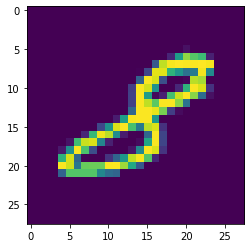

In [ ]:
# 숫자 눈으로 뿌려보기
import matplotlib.pyplot as plt
plt.imshow(X_single_data.reshape(28,28).cpu())
print(Y_single_data)